<a href="https://colab.research.google.com/github/eTcilopp/temp_python_intro_course_gb/blob/master/probability_theory/homework_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №9
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):<br> zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],<br> ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].<br> Используя математические операции, посчитать коэффициенты линейной регрессии,<br> приняв за X заработную плату (то есть, zp - признак),<br> а за y - значения скорингового балла (то есть, ks - целевая переменная).<br> Произвести расчет как с использованием intercept, так и без.

Решение.<br>

Применим формулы расчета коэффициентов линейной регрессии

$$b=\frac {n \sum ^n_{i=1}x_iy_i-(\sum ^n_{i=1}x_i(\sum ^n_{i=1}y_i)}{n\sum ^n_{i=1}x_i^2-(\sum ^n_{i=1}x_i)^2}$$

$$a =\overline y - b \overline x$$

$$\overline y = \frac {\sum _{i=1}^ny_i}{n}$$

$$\overline x = \frac {\sum _{i=1}^nx_i}{n}$$

In [2]:
import numpy as np

In [25]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = len(zp)

m = (n * np.sum(zp * ks) - np.sum(zp) * np.sum(ks))/(n * np.sum(zp**2)-np.sum(zp)**2)

b = np.mean(ks) - m * np.mean(zp)

Получаем формулу вида
$$\hat y = b + m \hat x$$
$$ks = b + m * ks$$

In [26]:
print(f'ks = {b} + {m} * zp')

ks = 444.17735732435955 + 2.6205388824027653 * zp


Изобразим результат на графике для самопроверки

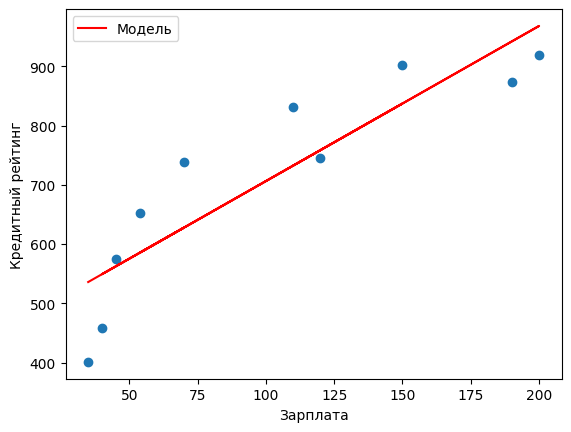

In [27]:
import matplotlib.pyplot as plt

plt.scatter(zp, ks)

y_line = b + m * zp

plt.plot(zp, y_line, color='red', label='Модель')

plt.xlabel('Зарплата')
plt.ylabel('Кредитный рейтинг')

plt.legend()
plt.show()

Теперь без интерсепта

In [31]:
m = np.sum(zp * ks) / np.sum(zp**2)
print(f'ks = {m} * zp')


ks = 5.889820420132689 * zp


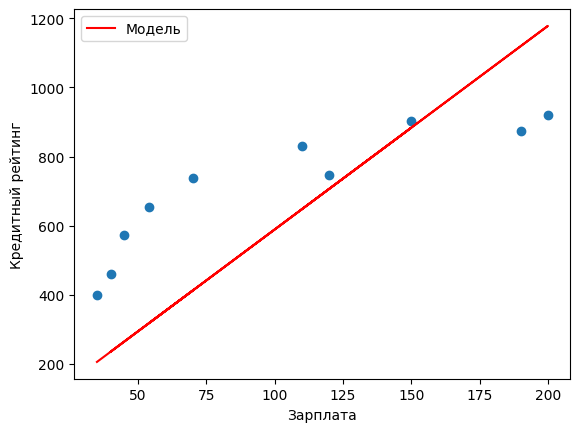

In [32]:
plt.scatter(zp, ks)

y_line = m * zp

plt.plot(zp, y_line, color='red', label='Модель')

plt.xlabel('Зарплата')
plt.ylabel('Кредитный рейтинг')

plt.legend()
plt.show()

## Задача 2. <br>
Посчитать коэффициент линейной регрессии при заработной плате (zp),<br> используя градиентный спуск (без intercept).


Без интерсепта - получим формулу вида
$$ks = m*zp$$

In [15]:
learning_rate = 0.000001
iterations = 1000
m = 0  # начальное значение
n = len(zp)

for i in range(iterations):
  m -= learning_rate * (2/n) * np.sum((m * zp - ks) * zp)
  if i % 100 == 0:
    print(m)
print(f'ks = {m}*zp')



0.1622834
5.5394293260608665
5.868384693331921
5.888509055799373
5.8897401953551185
5.889815512255624
5.8898201198855835
5.889820401764599
5.889820419008992
5.889820420063945
ks = 5.889820420128365*zp


Построим линию по получившемуся уравнению:

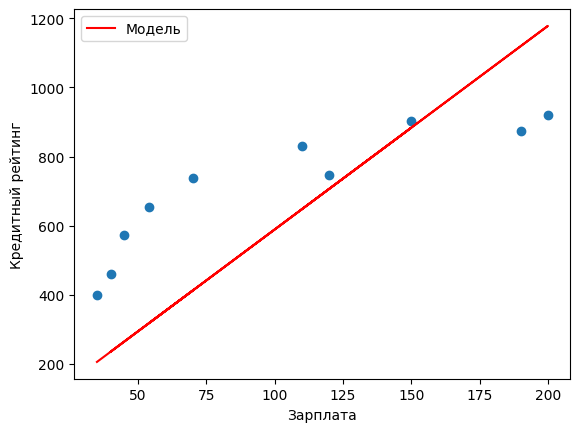

In [16]:
import matplotlib.pyplot as plt

plt.scatter(zp, ks)

y_line = m * zp

plt.plot(zp, y_line, color='red', label='Модель')

plt.xlabel('Зарплата')
plt.ylabel('Кредитный рейтинг')

plt.legend()
plt.show()

## Задача 3.
Произвести вычисления как в пункте 2, но с вычислением intercept.<br> Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно<br>
(то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Решение:<br>
Вычислим коэффициенты для уравнения вида $$ks = b + zp * m$$


In [17]:
learning_rate = 0.000001
m = 0
b = 0
iterations = 1000
n = len(zp)

for i in range(iterations):
    y_pred = m*zp + b  # Текущие предсказанные значения
    D_m = (-2/n) * sum(zp * (ks - y_pred))  # Производная по m
    D_b = (-2/n) * sum(ks - y_pred)        # Производная по b
    m = m - learning_rate * D_m  # Обновляем m
    b = b - learning_rate * D_b  # Обновляем b

print(f'ks={b}+ {m}*zp')


ks=0.2686029134056048+ 5.887903578197388*zp


Построим график:


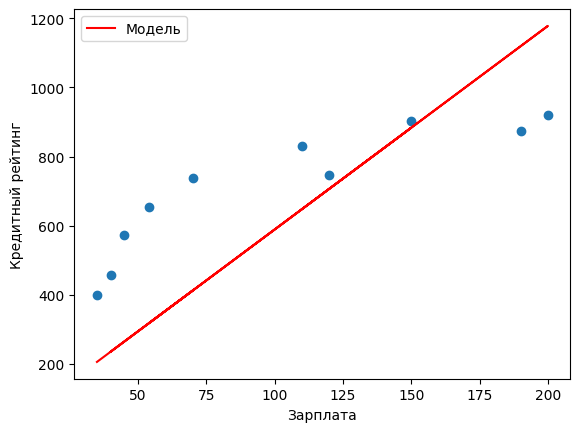

In [19]:
plt.scatter(zp, ks)

y_line =b + m * zp

plt.plot(zp, y_line, color='red', label='Модель')

plt.xlabel('Зарплата')
plt.ylabel('Кредитный рейтинг')

plt.legend()
plt.show()